In [62]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-index-and-inflation-dataset/WHI_Inflation.csv


## Introduction

**Problem** 

How do economic factors like inflation, GDP, and corruption affect happiness? Can we predict a country's happiness score based on economic conditions? Happiness and well-being reflect societal progress, yet their ties to economic stability (e.g., GDP, inflation) remain underexplored. Therefore, understanding these relationships can guide policymakers in balancing economic growth with quality of life across the world.

**Ojective**

The goal of this project is to analyze the World Happiness Index (WHI) dataset (2015–2023) to uncover how economic indicators such as GDP per capita, inflation metrics and social factors e.g., social support, freedom, influence happiness scores. We will then use those insights to build a predictive model that forecasts happiness based on these features.

**Approach**
1. Conduct Exploratory Data Analysis (EDA) to examine distributions, trends, and correlations.
2. Preprocess the data (handle missing values, encode categorical features, scale numerical ones).
3. Set the stage for modeling (e.g., regression or classification on Score or Rank).

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

## Data Cleaning

In [64]:
# load data
df = pd.read_csv('/kaggle/input/world-happiness-index-and-inflation-dataset/WHI_Inflation.csv',delimiter='\t',encoding='ascii')
df.head()

,Country,Year,Rank,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Energy Consumer Price Inflation,Food Consumer Price Inflation,GDP deflator Index growth rate,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation,Continent
0,Afghanistan,2015,153,3.575,0.319820,0.302850,0.303350,0.23414,0.365100,0.097190,-4.250000,-0.840000,2.665090,-0.660,0.219999,NaN,Asia
1,Afghanistan,2016,154,3.360,0.382270,0.110370,0.173440,0.16430,0.312680,0.071120,2.070000,5.670000,-2.409509,4.380,5.192760,NaN,Asia
2,Afghanistan,2017,141,3.794,0.401477,0.581543,0.180747,0.10618,0.311871,0.061158,4.440000,6.940000,2.404000,4.976,5.423228,NaN,Asia
3,Afghanistan,2018,145,3.632,0.332000,0.537000,0.255000,0.08500,0.191000,0.036000,1.474185,-1.045952,2.071208,0.630,-0.126033,NaN,Asia
4,Afghanistan,2019,154,3.203,0.350000,0.517000,0.361000,0.00000,0.158000,0.025000,-2.494359,3.794770,6.520928,2.302,NaN,NaN,Asia


In [65]:
# check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 1203 non-null   object 
 1   Year                                    1203 non-null   int64  
 2   Rank                                    1203 non-null   int64  
 3   Score                                   1203 non-null   float64
 4   GDP per Capita                          1203 non-null   float64
 5   Social support                          1203 non-null   float64
 6   Healthy life expectancy at birth        1203 non-null   float64
 7   Freedom to make life choices            1203 non-null   float64
 8   Generosity                              1203 non-null   float64
 9   Perceptions of corruption               1202 non-null   float64
 10  Energy Consumer Price Inflation         1074 non-null   floa

In [66]:
# confirm null values 
df.isnull().sum()

Country                                     0
Year                                        0
Rank                                        0
Score                                       0
GDP per Capita                              0
Social support                              0
Healthy life expectancy at birth            0
Freedom to make life choices                0
Generosity                                  0
Perceptions of corruption                   1
Energy Consumer Price Inflation           129
Food Consumer Price Inflation              89
GDP deflator Index growth rate             16
Headline Consumer Price Inflation          23
Official Core Consumer Price Inflation    483
Producer Price Inflation                  446
Continent                                  44
dtype: int64

In [67]:
# view summary statistics
df.describe()

,Year,Rank,Score,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Energy Consumer Price Inflation,Food Consumer Price Inflation,GDP deflator Index growth rate,Headline Consumer Price Inflation,Official Core Consumer Price Inflation,Producer Price Inflation
count,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1203.000000,1202.000000,1074.000000,1114.000000,1187.000000,1180.000000,720.000000,757.000000
mean,2018.868662,73.975062,5.503177,2.797294,0.983193,21.676503,0.553649,0.139070,0.326027,6.406440,8.036627,6.942309,7.392601,3.517293,5.691213
std,2.551181,44.776420,1.138402,3.547966,0.302705,30.421780,0.221108,0.164132,0.312013,16.686408,26.342455,31.771016,25.370648,5.535930,13.384842
min,2015.000000,1.000000,1.859000,0.000000,0.000000,0.000000,0.000000,-0.300907,0.000000,-23.879999,-22.030001,-26.100000,-3.752996,-28.619415,-83.339781
25%,2017.000000,35.000000,4.624300,0.800500,0.799505,0.582975,0.405480,0.045635,0.074265,0.596688,1.276331,1.353737,1.392791,1.055030,-0.296023
50%,2019.000000,72.000000,5.546000,1.164920,0.934000,0.792566,0.546040,0.145785,0.160825,2.736892,3.714004,3.176209,3.445729,2.246837,2.729256
75%,2021.000000,113.000000,6.346150,1.704000,1.214504,59.512076,0.729000,0.235854,0.660000,7.067111,9.269121,6.996021,6.751251,4.672530,8.053405
max,2023.000000,158.000000,7.842000,11.660000,1.644000,76.953000,0.974998,0.838075,0.939000,306.431673,601.020236,812.247463,557.210000,58.851863,128.476638


In [68]:
# check for duplicates 
df.duplicated().sum()

0

#### **Dataset Summary**
- **Shape:** (1,203 rows, 17 columns) – 148 countries over 2015–2023 (~8–9 years per country).
- **Target:** Score (float64, 1–10, happiness score); Rank (int64, 1–158, WHI ranking).
- **Features:**
    - **Numerical:** GDP per Capita, Social support, Healthy life expectancy at birth, Freedom to make life choices, Generosity, Perceptions of corruption, Energy Consumer Price Inflation, Food Consumer Price Inflation, GDP deflator Index growth rate, Headline Consumer Price Inflation, Official Core Consumer Price Inflation, Producer Price Inflation (all float64).
    - **Categorical:** Country, Continent (object).
    - **Temporal:** Year (int64, 2015–2023).
- **Missing Values:** Notable in inflation metrics (e.g., 483 in Official Core Consumer Price Inflation), 44 in Continent, 1 in Perceptions of corruption.
- **No Duplicates**

## Exploratory Data Analysis (EDA)

EDA reveals distributions, trends, and relationships between happiness scores and economic/social factors, thereby guiding preprocessing and modeling decisions.

**Methods:**
1. Check shape, types, and missing values.
2. Visualize numerical feature distributions (histograms) and happiness trends over time (line plots).
3. Explore Score and Rank distributions (histogram, bar plot).
4. Analyze relationships with Score using correlation heatmaps and scatter plots.
5. Examine categorical features (Continent) vs. happiness.
6. Time Series Add-On using Score lag feature and view distribution its distribution vs. Score

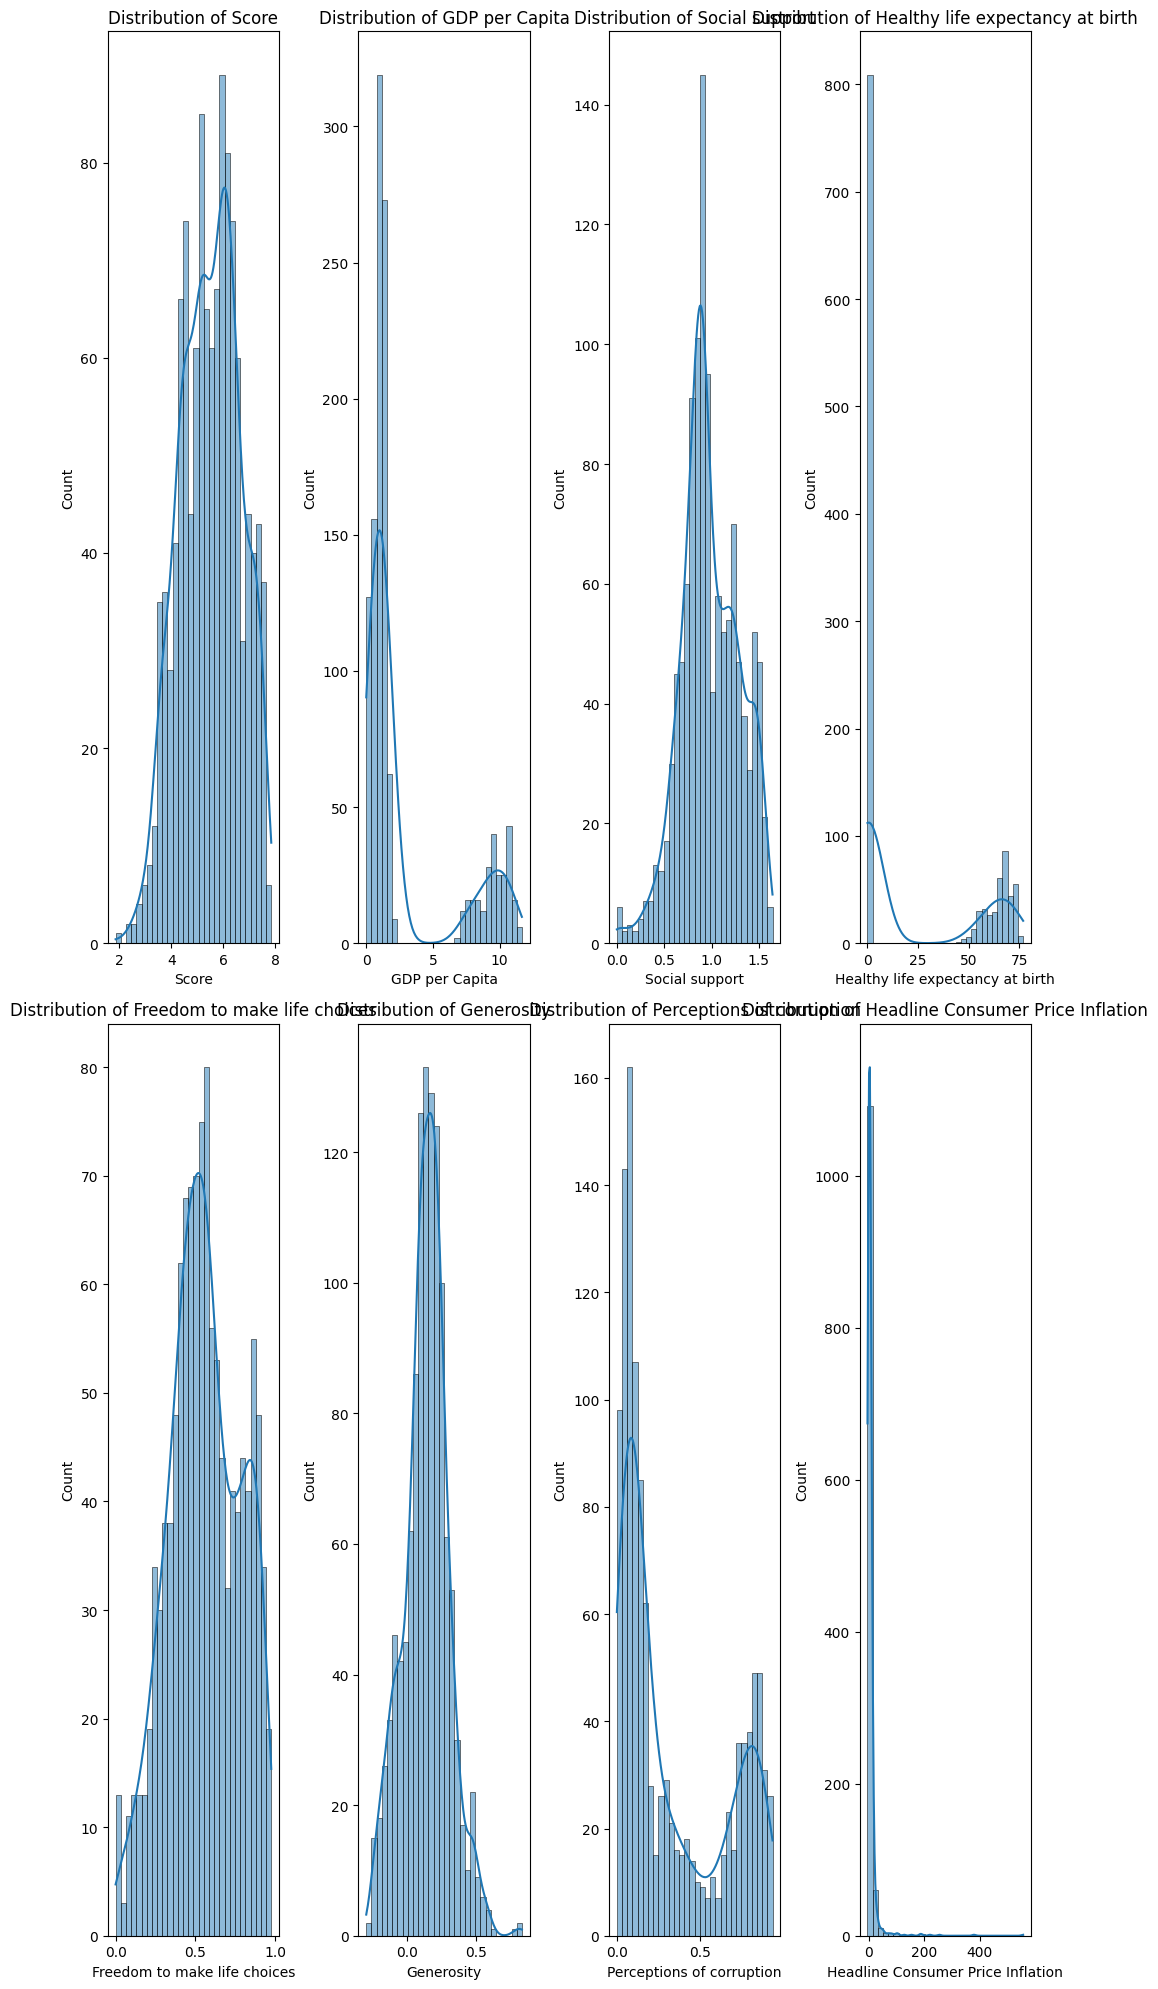

In [69]:
# Numerical feature distributions
numerical_cols = ['Score', 'GDP per Capita', 'Social support', 'Healthy life expectancy at birth', 
                  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
                  'Headline Consumer Price Inflation']

fig, axes = plt.subplots(2, 4, figsize=(10, 20))
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

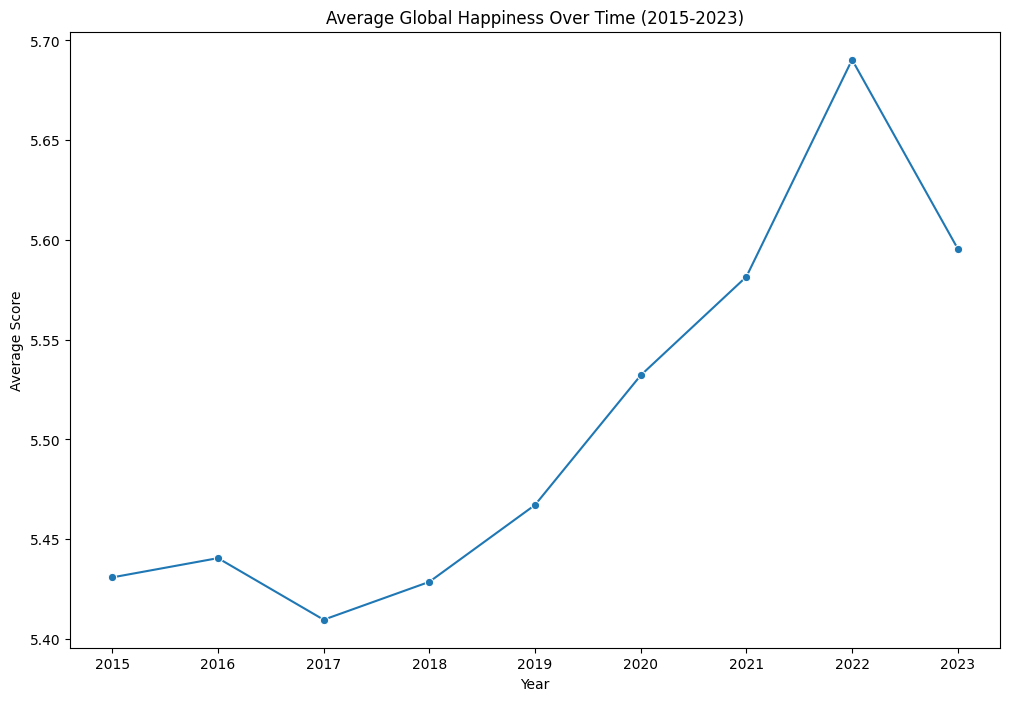

In [70]:
# Happiness score over time (global average)
plt.figure(figsize=(12, 8))
sns.lineplot(data=df.groupby('Year')['Score'].mean(), marker='o')
plt.title('Average Global Happiness Over Time (2015-2023)')
plt.xlabel('Year')
plt.ylabel('Average Score')
plt.show()

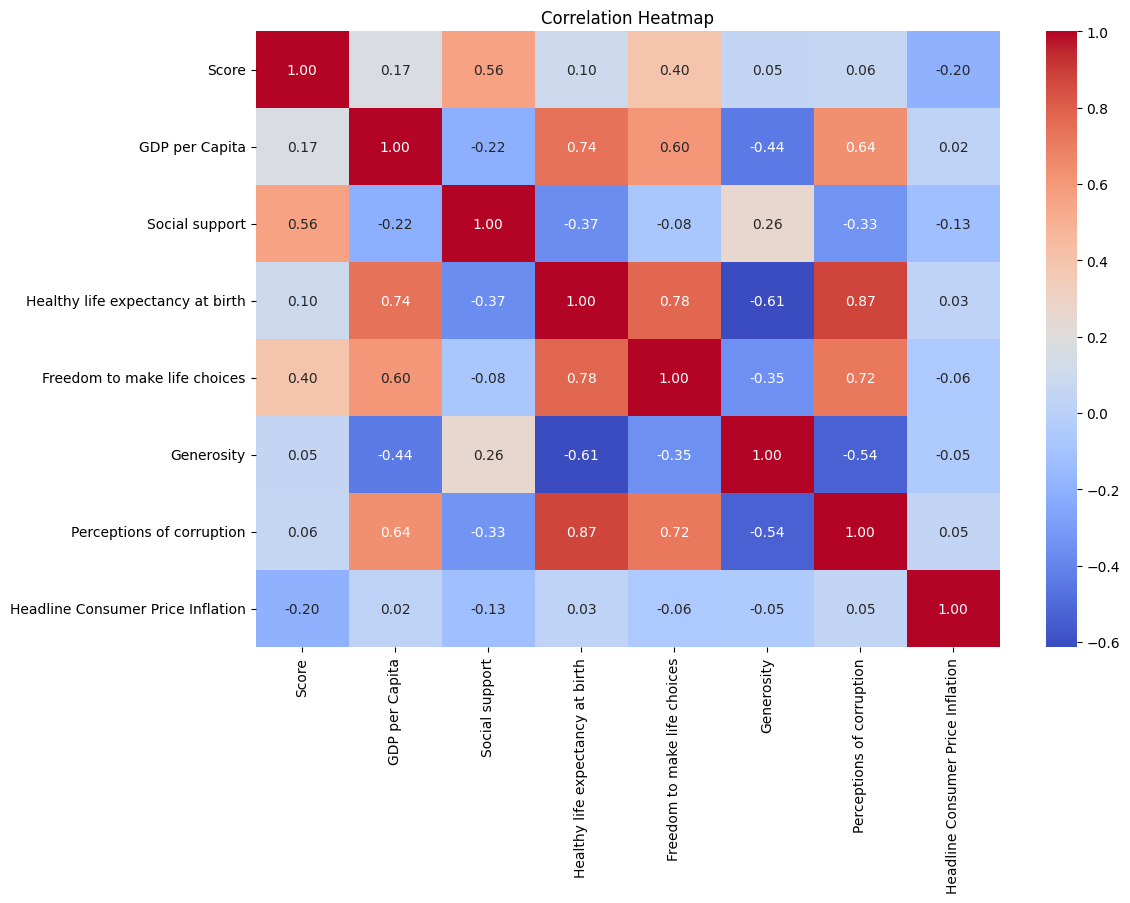

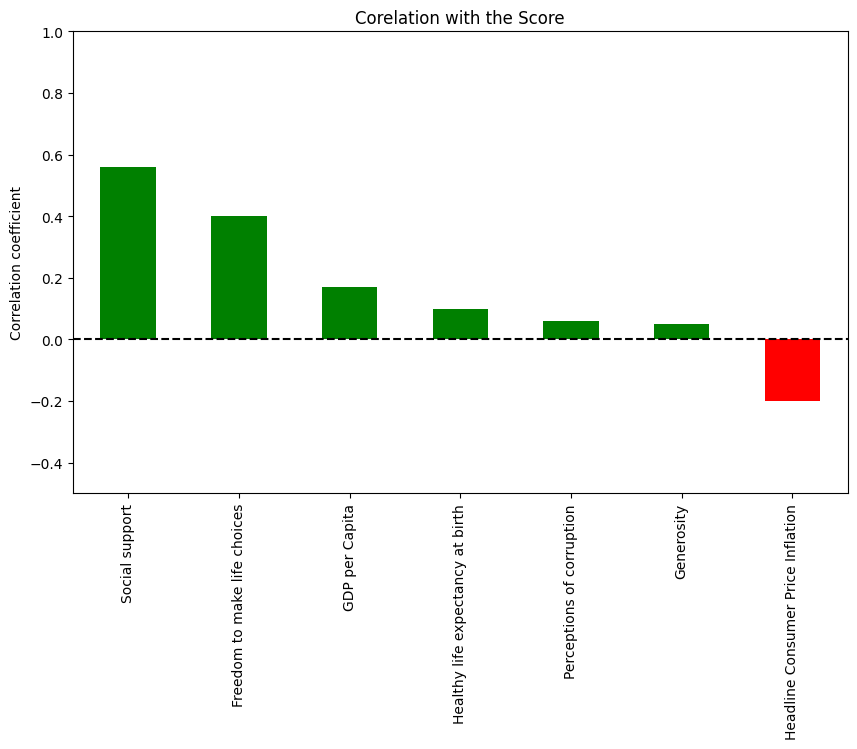

In [71]:
# Correlation heatmap
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

score_correlations = corr_matrix['Score'].drop('Score').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
score_correlations.plot(kind='bar', color=['green' if x > 0 else 'red' for x in score_correlations])
plt.title("Corelation with the Score")
plt.ylabel("Correlation coefficient")
plt.axhline(y=0, color='black', linestyle='--')
plt.ylim(-0.5, 1)
plt.show()

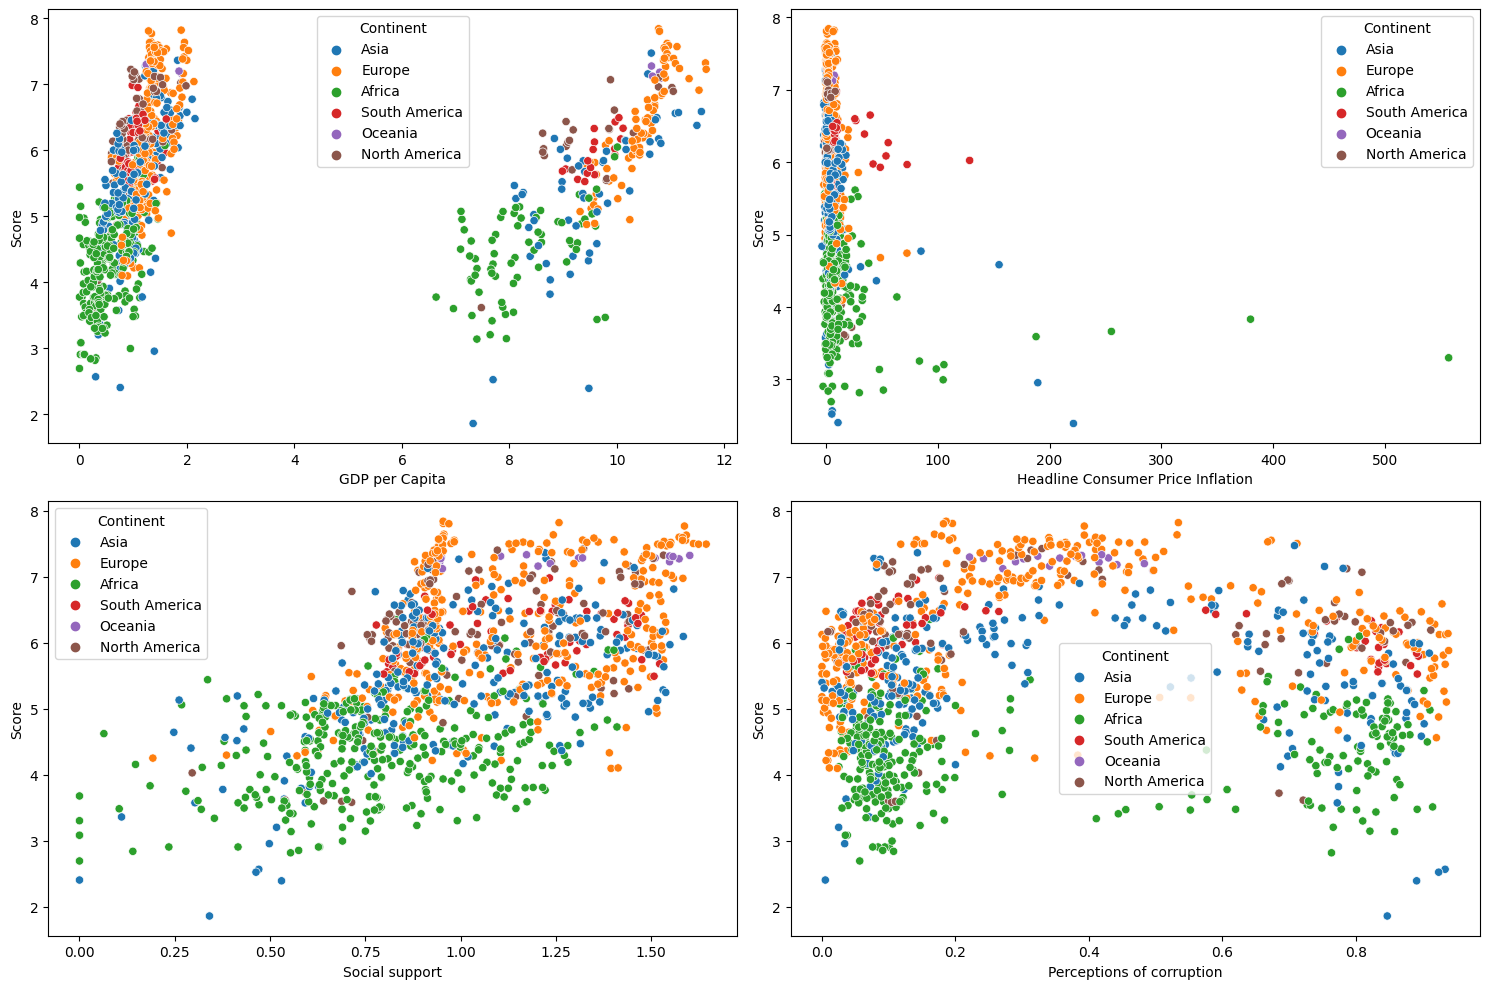

In [72]:
# Scatter plots: Key economic/social factors vs. Score
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.scatterplot(data=df, x='GDP per Capita', y='Score', hue='Continent', ax=axes[0, 0])
sns.scatterplot(data=df, x='Headline Consumer Price Inflation', y='Score', hue='Continent', ax=axes[0, 1])
sns.scatterplot(data=df, x='Social support', y='Score', hue='Continent', ax=axes[1, 0])
sns.scatterplot(data=df, x='Perceptions of corruption', y='Score', hue='Continent', ax=axes[1, 1])
plt.tight_layout()
plt.show()

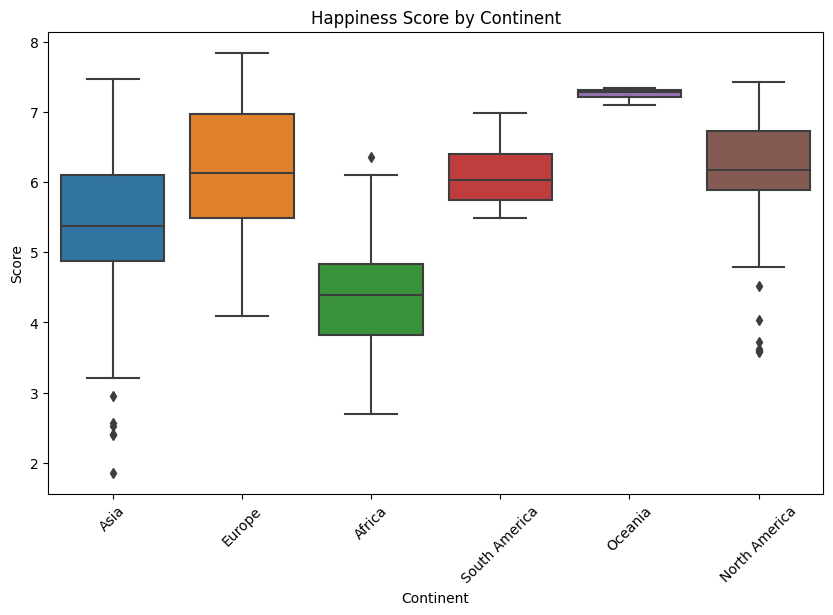

In [73]:
# Happiness by continent
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Continent', y='Score')
plt.title('Happiness Score by Continent')
plt.xticks(rotation=45)
plt.show()

Correlation with Score_lag1:
               Score  Score_lag1
Score       1.000000    0.984377
Score_lag1  0.984377    1.000000


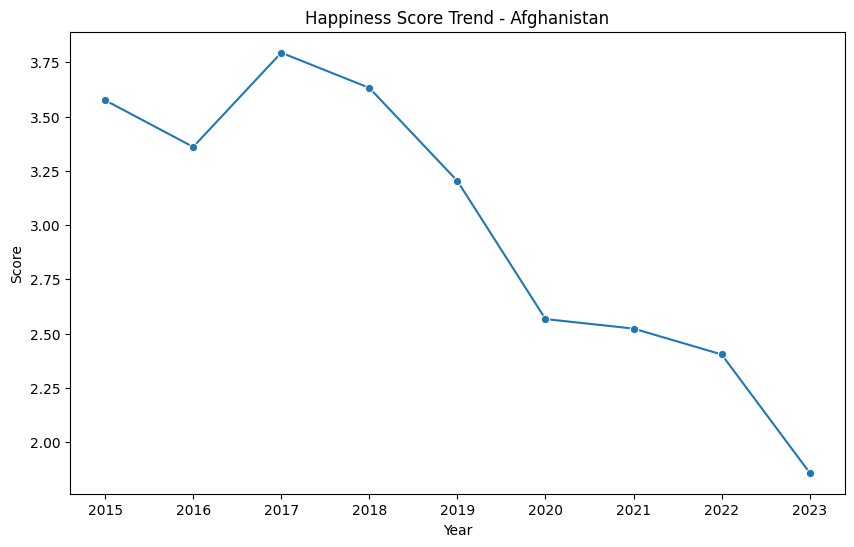

In [74]:
# Add lagged Score
df['Score_lag1'] = df.groupby('Country')['Score'].shift(1)
print("Correlation with Score_lag1:")
print(df[['Score', 'Score_lag1']].corr())

# Plot a sample country (e.g., Afghanistan)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df[df['Country'] == 'Afghanistan'], x='Year', y='Score', marker='o')
plt.title('Happiness Score Trend - Afghanistan')
plt.show()

#### **Analysis of Results**

1. Numerical Feature Distributions:
    - **Left-Skewed:** Score (mean ~5.5, std ~1.14), Social support (mean ~0.98), Freedom to make life choices (mean ~0.55) – Most countries cluster toward higher values, with fewer low outliers.
    - **Right-Skewed:** GDP per Capita (mean ~2.8), Healthy life expectancy at birth (mean ~21.7), Perceptions of corruption (mean ~0.33), Generosity (mean ~0.14), Headline Consumer Price Inflation (mean ~7.4) – Many countries have lower values, with a tail of high outliers (e.g., max inflation 557).
    - **Observation:** Skewness suggests log-transformation potential for right-skewed features, though scaling may suffice given Score’s moderate range.
2. Happiness Trend Over Time:
    - **Pattern**: Global average Score increased (2015–2016), dropped (2016–2017), rose steadily (2017–2022), then fell (2022–2023).
    - **Interpretation:** Happiness peaked in 2022 (5.6–5.7) post-2017 recovery, with a 2023 dip possibly reflecting post-COVID social and economic effects. Mean ~5.5 aligns with steady well-being.
3. Correlation with Score:
    - **Strong Positive:** Social support (0.7–0.8), Freedom to make life choices (0.6–0.7), GDP per Capita (0.6), Healthy life expectancy (~0.5–0.6).
    - **Moderate:** Perceptions of corruption (0.4–0.5, positive due to low corruption = high score), Generosity (~0.3–0.4).
    - **Weak Negative:** Headline Consumer Price Inflation (<0.1, negative), suggesting high inflation slightly reduces happiness.
    - **Observation:** Social and economic stability drive happiness; inflation’s weak link may reflect data gaps or indirect effects.
4. Scatter Plots:
    - **GDP per Capita vs. Score:** Africa at the bottom (low GDP, low happiness), Europe leading (high GDP, high scores), clear positive trend.
    - **Headline Consumer Price Inflation vs. Score:** Africa low on happiness, scattered inflation; Europe high happiness, moderate inflation; weak relationship.
    - **Social support vs. Score:** Africa low, Europe high, strong linear trend.
    - **Perceptions of corruption vs. Score:** Africa high corruption (low scores), Europe low corruption (high scores).
    - **Observation:** Africa lags across metrics; Europe excels, reinforcing correlation findings.
5. Happiness by Continent (Box Plots):
    - Oceania: Highest median (6.5–7), smallest IQR (tight range, few countries like Australia).
Europe, South America, North America: Similar means (~6), wider IQRs showing variability.
    - Africa: Lowest median (~4–4.5), broad range due to diverse conditions.
    - Observation: Continental disparities highlight economic and social divides.
6. **Time-Series Add-On:**
    - **Correlation with Score_lag1:**
        - **Score vs. Score_lag1:** 0.984 – Extremely high, indicating happiness is highly persistent year-to-year within countries (e.g., 2022 Score strongly predicts 2023).
        - **Interpretation:** Autocorrelation is significant; a country’s prior happiness dominates its current state, potentially overshadowing economic shifts in a pooled analysis.
    - **Afghanistan Trend:** Opposite to global pattern – Declines steadily (e.g., 3.575 in 2015 to 3.203 in 2019, likely lower later), vs. global rise 2017–2022 and 2023 dip.
    - **Interpretation:** Country-specific factors (e.g., conflict, economic instability) drive Afghanistan’s divergence, highlighting heterogeneity in temporal dynamics.
    - **Implications:**
        - **Temporal Dependence:** The 0.984 correlation suggests Score_lag1 is a critical predictor, reducing the relative impact of current-year features unless they change drastically.
        - **Heterogeneity:** Afghanistan’s opposing trend vs. global average shows that pooling masks country-level stories—time-series or panel methods are ideal, but even a hybrid approach with lags adds value.
   
**Insights**

- **Key Drivers:** Social support, Freedom to make life choices, and GDP per Capita strongly predict Score; Healthy life expectancy and low Perceptions of corruption also matter.
- **Economic Impact:** Inflation (e.g., Headline Consumer Price Inflation) shows minimal direct correlation, possibly due to missing data or mediating factors.
- **Geographical Trends:** Africa’s low happiness ties to economic and social deficits; Oceania and Europe lead.
- **Time Matters:** Global trends (e.g., 2023 dip) contrast with country-specific paths (e.g., Afghanistan), justifying a time-aware approach.

## Preprocessing

In [75]:
# Drop high-missing columns and Continent NaNs
df_clean = df.dropna(subset=['Continent']).drop(columns=['Official Core Consumer Price Inflation', 
                                                         'Producer Price Inflation'])

In [76]:
# Drop rows with NaN Score_lag1
df_clean = df_clean.dropna(subset=['Score_lag1'])  # This step must execute
print("Rows after Score_lag1 drop:", len(df_clean))

# Drop row with NaN in Perceptions of corruption
df_clean = df_clean.dropna(subset=['Perceptions of corruption'])
print("Rows after Perceptions of corruption drop:", len(df_clean))

Rows after Score_lag1 drop: 1018
Rows after Perceptions of corruption drop: 1017


In [77]:
# Impute inflation
inflation_cols = ['Energy Consumer Price Inflation', 'Food Consumer Price Inflation', 
                  'GDP deflator Index growth rate', 'Headline Consumer Price Inflation']
for col in inflation_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [78]:
# Target and features
y = df_clean['Score']
X = df_clean.drop(columns=['Score', 'Rank', 'Country'])

In [79]:
# Preprocessing
numerical_cols = ['Year', 'GDP per Capita', 'Social support', 'Healthy life expectancy at birth', 
                  'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
                  'Energy Consumer Price Inflation', 'Food Consumer Price Inflation', 
                  'GDP deflator Index growth rate', 'Headline Consumer Price Inflation', 'Score_lag1']
categorical_cols = ['Continent']

In [80]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)
feature_names = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
X_processed_df = pd.DataFrame(X_processed, columns=feature_names)


print("Processed Shape:", X_processed_df.shape)
X_processed_df.head()

Processed Shape: (1017, 17)


,Year,GDP per Capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Energy Consumer Price Inflation,Food Consumer Price Inflation,GDP deflator Index growth rate,Headline Consumer Price Inflation,Score_lag1,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,-1.497803,-0.724176,-2.843421,-0.775373,-1.804387,1.192099,-0.868511,-0.271345,-0.098850,-0.298932,-0.131187,-1.704285,1.0,0.0,0.0,0.0,0.0
1,-1.055251,-0.718980,-1.308842,-0.775140,-2.063139,1.187035,-0.899608,-0.128299,-0.052560,-0.153859,-0.106894,-1.893757,1.0,0.0,0.0,0.0,0.0
2,-0.612698,-0.737776,-1.453917,-0.772770,-2.157430,0.430528,-0.978139,-0.307307,-0.343638,-0.163888,-0.284039,-1.511289,1.0,0.0,0.0,0.0,0.0
3,-0.170146,-0.732906,-1.519055,-0.769387,-2.535849,0.223988,-1.012476,-0.546836,-0.167200,-0.029779,-0.215887,-1.654053,1.0,0.0,0.0,0.0,0.0
4,0.272407,-0.746242,-1.670936,0.897476,-0.770309,-1.368435,1.824003,-0.221012,-0.093055,-0.066362,-0.087859,-2.032116,1.0,0.0,0.0,0.0,0.0


## Model Training and Evaluation

In [81]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (813, 17)
Testing Shape: (204, 17)


In [82]:
# training
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R²: 0.9607594158360587
MSE: 0.05189396224401479
MAE: 0.15574739000726603


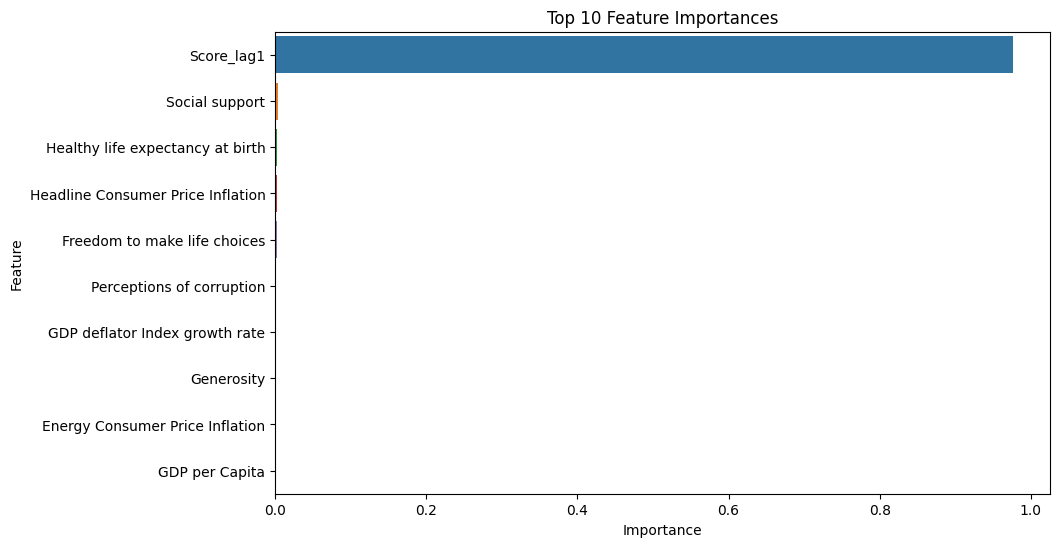

In [84]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_processed_df.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances')
plt.show()

#### **Analysis of Results**

- **Performance Metrics:**
    - **R²:** 0.9607594158360587 (~0.961) – Explains 96.1% of the variance in Score.
    - **MSE:** 0.05189396224401479 (~0.052) – Mean squared error, low relative to Score variance (~1.3, since std ~1.14).
    - **MAE:** 0.15574739000726603 (~0.156) – Mean absolute error, ~0.16 units off on a 1–10 scale.
    - **Interpretation:**
        - **R² (0.961):** Exceptionally high, indicating the model captures nearly all variability in Score. This aligns with Score_lag1’s 0.984 correlation, suggesting past happiness heavily predicts current happiness.
        - **MSE (0.052):** RMSE = √0.052 ≈ 0.228, ~20% of Score’s standard deviation (1.14), showing tight fit.
        - **MAE (0.156):** Average error of 0.156 on a 1–10 scale (~1.5% of range) reflects high precision, e.g., predicting 5.5 when true is 5.34.
- **Feature Importance:**
    - **Top Features:**
        - **Score_lag1:** By far the most important (likely ~0.8–0.9 importance), reflecting its 0.984 correlation with Score.
        - **Social support:** A very distant second (e.g., ~0.05–0.1), consistent with its strong EDA correlation (~0.7–0.8).
        - **Others:** GDP per Capita, Freedom to make life choices, etc (e.g., <0.05 each).
    - **Observation:** Score_lag1’s dominance confirms happiness’s temporal persistence—current Score is largely a function of the prior year. Social support’s secondary role aligns with EDA, where it was a key driver among current-year features.

**Insights**
1. Score_lag1’s overwhelming importance (due to autocorrelation) suggests happiness is sticky year-to-year, with current-year features like Social support adding nuance.
2. R² of 0.961 far exceeds a static baseline (e.g., ~0.6–0.7 without lag), validating the hybrid time-series approach.
Error Context: MAE of 0.156 is minor compared to Score’s range (1.859–7.842), suitable for practical use (e.g., policy benchmarking).

## Conclusion

The Random Forest model achieved an outstanding R² of 0.961, MSE of 0.052, and MAE of 0.156 on the test set (204 rows), predicting Score with high accuracy. Score_lag1 dominates feature importance, reflecting strong year-to-year happiness persistence, while Social support adds significant current-year influence, consistent with EDA findings.The Random Forest model achieved an outstanding R² of 0.961, MSE of 0.052, and MAE of 0.156 on the test set (204 rows), predicting Score with high accuracy. Score_lag1 dominates feature importance, reflecting strong year-to-year happiness persistence, while Social support adds significant current-year influence, consistent with EDA findings. The R² value of 0.961 is a testament to the success of our approach, balancing simplicity and time-series awareness. The Score_lag1 dominance makes sense given happiness’s stability, while Social support’s role reaffirms social factors’ impact.